## About Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

# Importing the relevat libiraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Get Data

In [2]:
# Load the data 
iris = pd.read_csv("Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking For null values

In [3]:
iris.isnull().sum().any()

False

The *False* means that their is no null values in the dataset

### Drop The Id Column

In [4]:
# Drop Id col
iris.drop('Id',axis = 1 ,inplace = True)
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Summary Of the Numerical Attributes 

In [5]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

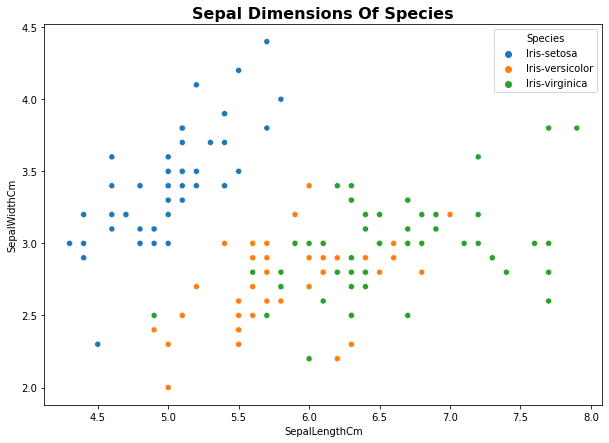

In [6]:
# First we will make a scatter plot to see the charactristics of sepal dimensions 
# Of the iris flowers
plt.figure(figsize=(10, 7))
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm",data=iris ,hue="Species")
plt.title("Sepal Dimensions Of Species", fontweight='bold', fontsize= 16)
plt.show()

As we can see here the Iris-setosa a short sepal length relative to the other two and relativly longer width, while the versicolor and verginica almost the same ratio between the length and width but the viginica has slightly higher ratio

### A quick box plot between all the features

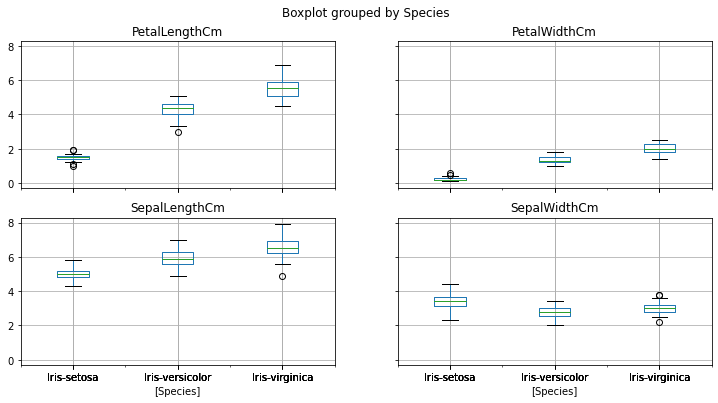

In [7]:
iris.boxplot(by="Species", figsize=(12, 6))
plt.show()

### let us look at an individual feature through a boxplot 

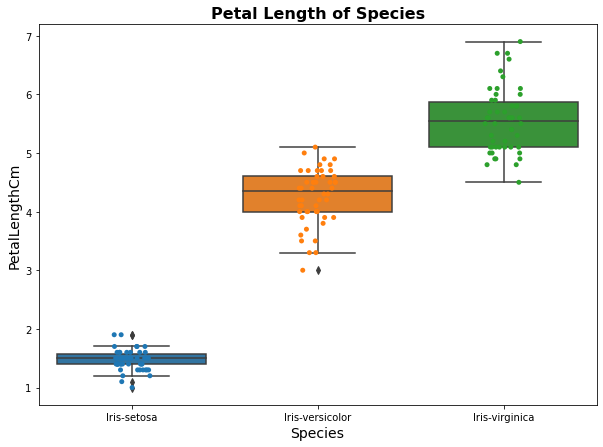

In [8]:
# Adjusting the figure size
plt.figure(figsize=(10, 7))

# Ploting petal to species
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

# Labeling the axies
plt.xlabel("Species", fontsize=14)
plt.ylabel("PetalLengthCm", fontsize=14)
plt.title("Petal Length of Species", fontweight="bold", fontsize=16)

# Showing the plot
plt.show()

#### A more informative plot would be the violin plot

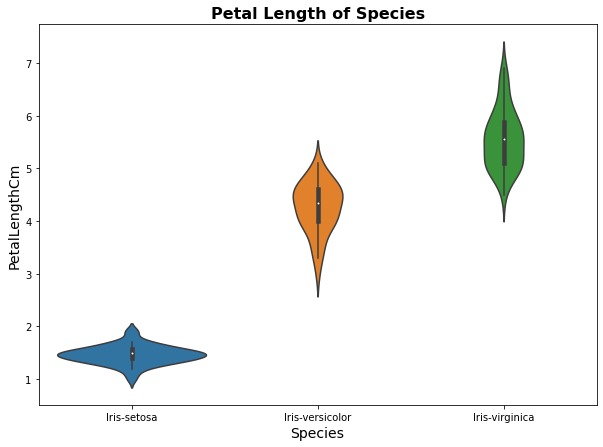

In [9]:
# Adjusting the figure size
plt.figure(figsize=(10, 7))

# Ploting petal to species
sns.violinplot(x="Species", y="PetalLengthCm", data=iris)

# Labeling the axies
plt.xlabel("Species", fontsize=14)
plt.ylabel("PetalLengthCm", fontsize=14)
plt.title("Petal Length of Species", fontweight="bold", fontsize=16)

# Showing the plot
plt.show()

As you can see the petal length also in the setosa plant is shorter the the other two plants but also most of the satosa length are *between 1 and 2 CM* with no one longer than 2cm.

<a id="3"></a>
## Correlation Between Variables

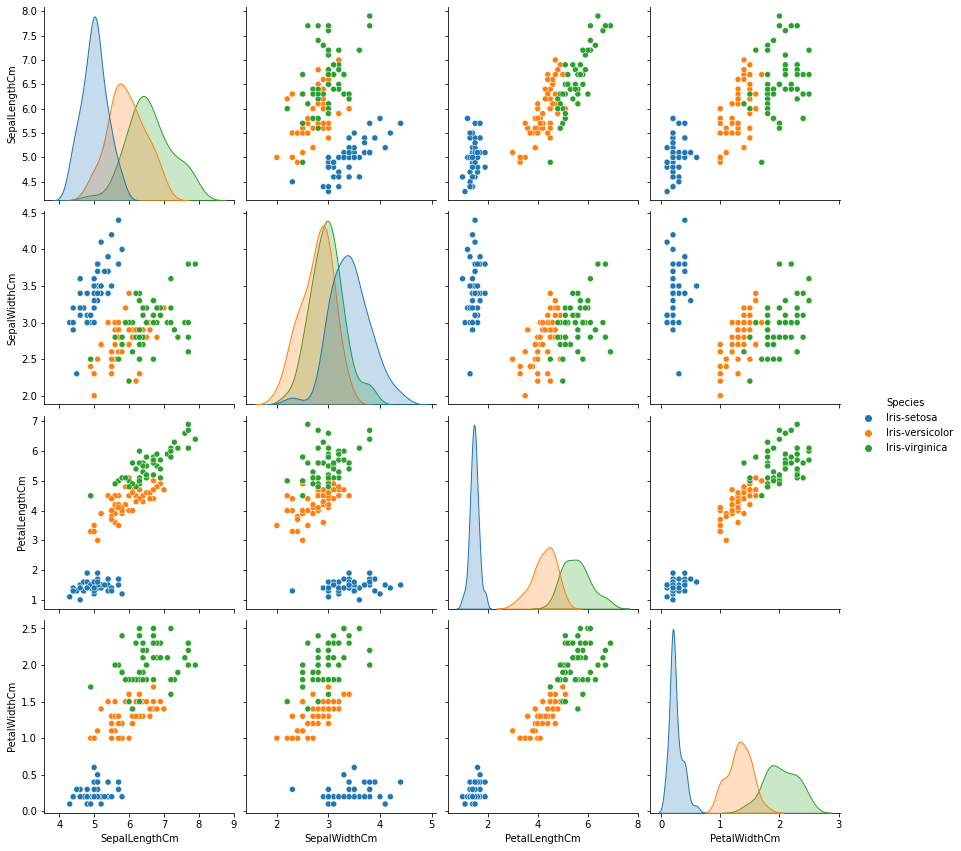

In [10]:
# Plots each numerical attribute against evry other numerical attribute
sns.pairplot(iris, hue="Species", height=3)
plt.show()

Almost in each we csn see high correlation espically with the "*Iris-setosa*"

In [11]:
# correlation between features
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


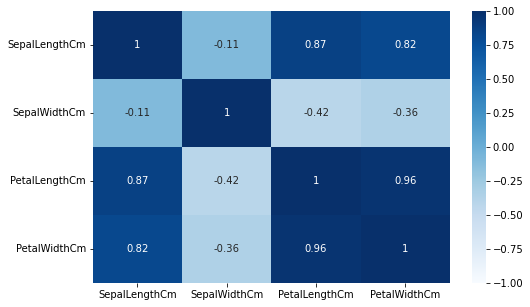

In [12]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(iris.corr(), cmap="Blues", vmin=-1, annot=True)
plt.show()

We can see three features which have high correlation: *Sepal Length*, *Petal Length* and *Petal Width*.
Comparing correlation matrix to the boxplots, gives the following **results**:

Primarily, three boxplots have the same pattern. Distribution of the “*Iris-setosa*” is in the low end, “*Iris-versicolor*” is in the middle and “*Iris-virginica*” is in the high end. This confirms high correlation between three features as we observed in correlation matrix.

Secondly, *“Iris-setosa”* is easy to distinguish in *Petal Length* and *Petal Width* values.

# Data Preparation

In [13]:
from sklearn.model_selection import train_test_split

# Spliting the data into attributes (X) and labels (y).
X = iris.drop("Species", axis=1)
y = iris["Species"].copy()

# Spliting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)


In [14]:
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Encoding String labels into numbers
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Standardisation for better processing data
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

# ColumnTransform enables us to transform differant types of columns in one pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, X_train.columns)
])


X_train_prepared = full_pipeline.fit_transform(X_train)
# X_test_prepared = full_pipeline.transform(X_test)
print(X_train_prepared[0])

[-0.05526438 -0.55134066  0.77656408  1.66052071]


## Baseline Models

We will train few different models with its default settings, After compare accuracy of these models, we can make a list of the best models.

### Logistic Regression

In [15]:
# Importing the models
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()

# Implementing estimator and evaluate a score by use cross-validation
# During fourfold training and evaluation, train data is divided in 4 folds, where one in each is used for validation
scores_log = cross_val_score(log_reg, X_train_prepared, y_train, cv=4,scoring="accuracy")
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ",scores.std())
    
display_scores(scores_log)

Scores:  [0.96666667 0.93333333 1.         0.93333333]
Mean:  0.9583333333333333
Std:  0.02763853991962833


### K-Neighbors 

In [16]:
# importing the model
from sklearn.neighbors import KNeighborsClassifier

# Insentiating the model
knn_clf = KNeighborsClassifier()

scores_knn = cross_val_score(knn_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_knn)

Scores:  [0.96666667 0.9        0.96666667 0.96666667]
Mean:  0.9500000000000001
Std:  0.02886751345948128


### SVC

In [17]:
#importing the model
from sklearn.svm import SVC

# Insentiating the model
svm_clf = SVC()

scores_svm = cross_val_score(svm_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_svm)

Scores:  [0.96666667 0.96666667 1.         0.96666667]
Mean:  0.9750000000000001
Std:  0.01443375672974064


### DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

scores_tree = cross_val_score(tree_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_tree)

Scores:  [0.96666667 0.93333333 0.9        0.93333333]
Mean:  0.9333333333333333
Std:  0.02357022603955158


### RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

scores_forest = cross_val_score(forest_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")

display_scores(scores_forest)

Scores:  [0.96666667 0.93333333 1.         0.93333333]
Mean:  0.9583333333333333
Std:  0.02763853991962833


#### We need to analysis errors of our algorithms to make better preformace 


## Error Analysis

we will use confussion matrix to analsis the errors

In [20]:
from sklearn.model_selection import cross_val_predict

# making predictions to compare it with the acctual values
pred_log = cross_val_predict(log_reg, X_train_prepared, y_train, cv=4)
pred_knn = cross_val_predict(knn_clf, X_train_prepared, y_train, cv=4)
pred_svm = cross_val_predict(svm_clf, X_train_prepared, y_train, cv=4)
pred_tree = cross_val_predict(tree_clf, X_train_prepared, y_train, cv=4)
pred_forest = cross_val_predict(tree_clf, X_train_prepared, y_train, cv=4)

print(pred_log[:5])

[2 1 0 1 0]


In [21]:
# Lets recall what these numbers mean
labels = le.classes_
en_labels = le.transform(labels)
for i, j in zip(labels, en_labels):
    print(i, ":", j)

Iris-setosa : 0
Iris-versicolor : 1
Iris-virginica : 2


In [22]:
from sklearn.metrics import confusion_matrix

# Each row in a confusion matrix represents a real class, whereas each column represents a predicted class
# The perfect classifier would have nonzero values only on its main diagonal 
print("Confusion Matrix Logistic Regression \n{}".format(confusion_matrix(y_train, pred_log)))
print("Confusion Matrix KNN \n{}".format(confusion_matrix(y_train, pred_knn)))
print("Confusion Matrix SVM \n{}".format(confusion_matrix(y_train, pred_svm)))
print("Confusion Matrix Decision Tree \n{}".format(confusion_matrix(y_train, pred_tree)))
print("Confusion Matrix Random Forest \n{}".format(confusion_matrix(y_train, pred_forest)))

Confusion Matrix Logistic Regression 
[[40  0  0]
 [ 0 40  2]
 [ 0  3 35]]
Confusion Matrix KNN 
[[40  0  0]
 [ 0 40  2]
 [ 0  4 34]]
Confusion Matrix SVM 
[[40  0  0]
 [ 0 41  1]
 [ 0  2 36]]
Confusion Matrix Decision Tree 
[[40  0  0]
 [ 0 39  3]
 [ 0  1 37]]
Confusion Matrix Random Forest 
[[40  0  0]
 [ 0 39  3]
 [ 0  4 34]]


As we can see the "*Iris-setosa*" have not got any errors , but th other two have some.
We kind of predicted this from the box-plot in the EDA part 

so now we will try some feature engineering for better preformance

# Feature Engineering

the box plot mentioned above showes that the "*Iris-versicolor*" and "*Iris-virginica*" more overlab on *Sepal* features so we will make new features using the *Petal* features; we will raise the petal to the third power and divide them by other features

In [23]:
X_train["RelLength"] = X_train["PetalLengthCm"] **3 / X_train["SepalLengthCm"]
X_train["RelWidth"] = X_train["PetalWidthCm"] ** 3 / X_train["SepalWidthCm"] 
X_train["RelPetal"] = X_train["PetalWidthCm"] ** 3 / X_train["PetalLengthCm"] 

X_test["RelLength"] = X_test["PetalLengthCm"] ** 3 / X_test["SepalLengthCm"] 
X_test["RelWidth"] = X_test["PetalWidthCm"] ** 3 / X_test["SepalWidthCm"] 
X_test["RelPetal"] = X_test["PetalWidthCm"] ** 3 / X_test["PetalLengthCm"] 

C:\Users\AMIR\AppData\Local\Temp/ipykernel_6520/2299188688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["RelLength"] = X_train["PetalLengthCm"] **3 / X_train["SepalLengthCm"]
C:\Users\AMIR\AppData\Local\Temp/ipykernel_6520/2299188688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["RelWidth"] = X_train["PetalWidthCm"] ** 3 / X_train["SepalWidthCm"]
C:\Users\AMIR\AppData\Local\Temp/ipykernel_6520/2299188688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

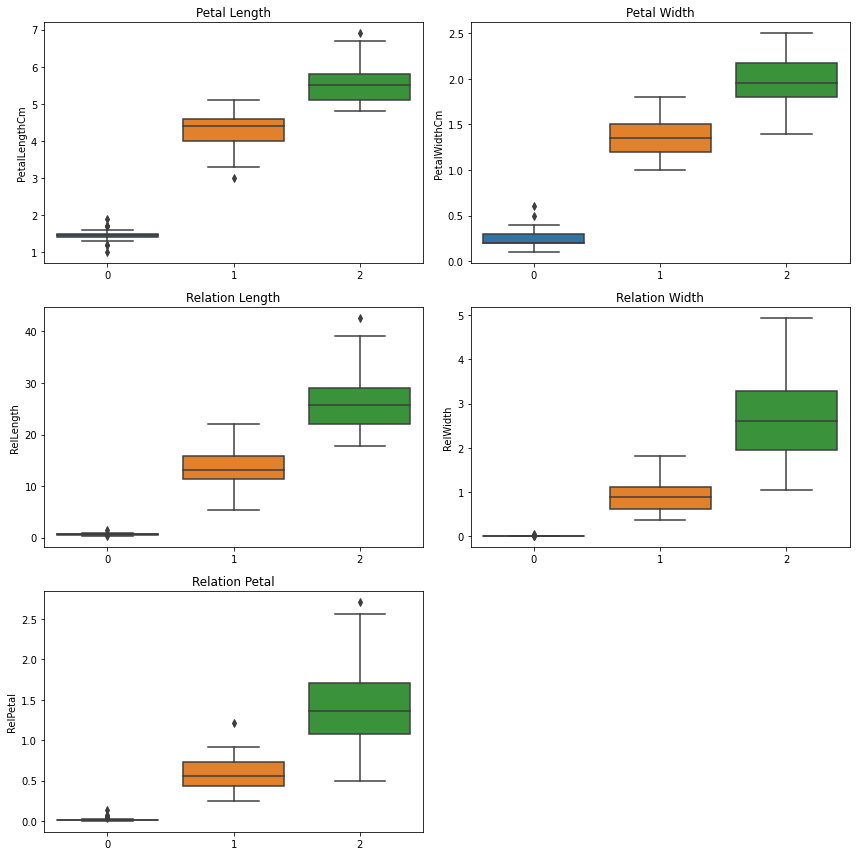

In [24]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.title("Petal Length")
sns.boxplot(y="PetalLengthCm", x=y_train, data=X_train,)
plt.subplot(3,2,2)
plt.title("Petal Width")
sns.boxplot(y="PetalWidthCm", x=y_train, data=X_train)
plt.subplot(3,2,3)
plt.title("Relation Length")
sns.boxplot(y="RelLength", x=y_train, data=X_train)
plt.subplot(3,2,4)
plt.title("Relation Width")
sns.boxplot(y="RelWidth", x=y_train, data=X_train)
plt.subplot(3,2,5)
plt.title("Relation Petal")
sns.boxplot(y="RelPetal", x=y_train, data=X_train)
plt.tight_layout()
plt.show()

In [25]:
# After adding the new features, we need to prepare the data again

X_train_new = X_train.copy()

# Making a new pipeline
full_pipeline_new = ColumnTransformer([
    ("num", num_pipeline, X_train_new.columns)
])

# Fitting the data
X_train_prepared_new = full_pipeline_new.fit_transform(X_train_new)
X_test_prepered_new = full_pipeline_new.transform(X_test)

# sanity check
print(X_train_prepared_new[0])

[-0.05526438 -0.55134066  0.77656408  1.66052071  0.87756577  2.98905194
  3.01638249]


After feaure engineering, let us check the accuracy of our base models again

In [26]:
print("Logistic Regression")
scores_log_fe = cross_val_score(log_reg, X_train_prepared_new, y_train,cv=4, scoring= "accuracy")
display_scores(scores_log_fe)
print("###################################################################")
print("\nKNN")
scores_knn_fe = cross_val_score(knn_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_knn_fe)
print("###################################################################")
print("\nSVM")
scores_svm_fe = cross_val_score(svm_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_svm_fe)
print("###################################################################")
print("\nDecision Tree")
scores_tree_fe = cross_val_score(tree_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_tree_fe)
print("###################################################################")
print("\nRandom Forest")
scores_forest_fe = cross_val_score(forest_clf, X_train_prepared_new, y_train, cv=4, scoring="accuracy")
display_scores(scores_forest_fe)
print("###################################################################")

Logistic Regression
Scores:  [0.96666667 0.93333333 1.         0.93333333]
Mean:  0.9583333333333333
Std:  0.02763853991962833
###################################################################

KNN
Scores:  [0.96666667 0.93333333 1.         0.93333333]
Mean:  0.9583333333333333
Std:  0.02763853991962833
###################################################################

SVM
Scores:  [0.96666667 0.93333333 1.         0.93333333]
Mean:  0.9583333333333333
Std:  0.02763853991962833
###################################################################

Decision Tree
Scores:  [0.96666667 1.         0.96666667 0.93333333]
Mean:  0.9666666666666668
Std:  0.02357022603955158
###################################################################

Random Forest
Scores:  [0.96666667 0.96666667 0.96666667 0.93333333]
Mean:  0.9583333333333333
Std:  0.01443375672974064
###################################################################


*As we can see the accuracy got higher, but we might now have overfitting in our models, let us check*

## Learning Curve
Learning curves indicates on model performance of the training set and the validation set.

In [27]:
from sklearn.model_selection import learning_curve

def learn_curve(model, X, y):
    """
    
    """
    train_sizes, train_scores, val_scores = learning_curve(model,X,y,cv=4,scoring="accuracy")
    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    
    # printing scores 
    print("\n", "-"*5, model, "-"*5)
    print("Training scores: ")
    display_scores(train_scores_mean)
    print("\nValidation scores: ")
    display_scores(val_scores_mean)
    
    # Plot learning curve    
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, val_scores_mean, label="Validation Score")
    plt.title(model)
    plt.xlabel("Training Sizes")
    plt.ylabel("Accuracy")
    plt.legend()


 ----- LogisticRegression() -----
Training scores: 
Scores:  [1.         0.99137931 0.9744898  0.97463768 0.975     ]
Mean:  0.983101357484523
Std:  0.010634974612655588

Validation scores: 
Scores:  [0.86666667 0.94166667 0.95       0.95833333 0.95833333]
Mean:  0.9349999999999999
Std:  0.03472111109333273


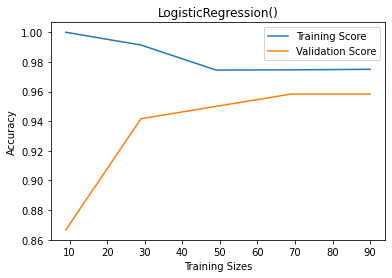

In [28]:
learn_curve(log_reg, X_train_prepared_new, y_train) # good fit


 ----- KNeighborsClassifier() -----
Training scores: 
Scores:  [0.97222222 0.97413793 0.95408163 0.9673913  0.97222222]
Mean:  0.968011062495963
Std:  0.0073132669372715075

Validation scores: 
Scores:  [0.78333333 0.95       0.95       0.95       0.95833333]
Mean:  0.9183333333333333
Std:  0.06757711644237764


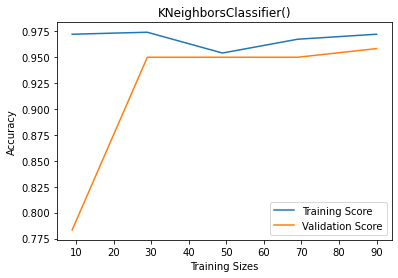

In [29]:
learn_curve(knn_clf, X_train_prepared_new, y_train) # good fit


 ----- SVC() -----
Training scores: 
Scores:  [1.         0.99137931 0.9744898  0.97463768 0.97777778]
Mean:  0.9836569130400786
Std:  0.010263320349522686

Validation scores: 
Scores:  [0.875      0.95       0.95       0.95833333 0.95833333]
Mean:  0.9383333333333332
Std:  0.0318852107828483


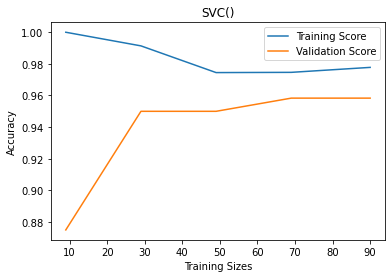

In [30]:
learn_curve(svm_clf, X_train_prepared_new, y_train) # good fit


 ----- DecisionTreeClassifier() -----
Training scores: 
Scores:  [1. 1. 1. 1. 1.]
Mean:  1.0
Std:  0.0

Validation scores: 
Scores:  [0.84166667 0.93333333 0.94166667 0.95833333 0.975     ]
Mean:  0.93
Std:  0.04642796092394708


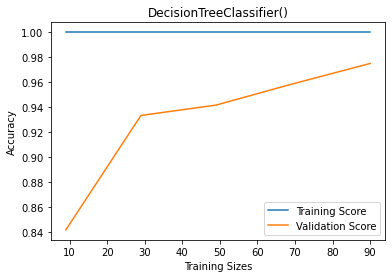

In [31]:
learn_curve(tree_clf, X_train_prepared_new, y_train) # overfit


 ----- RandomForestClassifier() -----
Training scores: 
Scores:  [1. 1. 1. 1. 1.]
Mean:  1.0
Std:  0.0

Validation scores: 
Scores:  [0.88333333 0.95       0.95833333 0.95833333 0.95      ]
Mean:  0.9400000000000001
Std:  0.028577380332470412


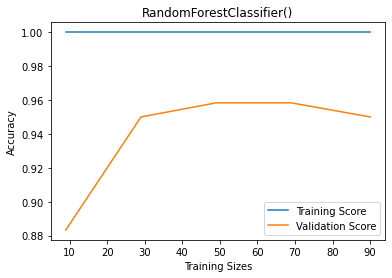

In [32]:
learn_curve(forest_clf, X_train_prepared_new, y_train) # overfit

The first three models (log_reg, knn_clf, svm_clf) indicate on a good fit models. However, we can make it better during hyperparameter tuning. In this case, we can decrease the bias.
Next two models (tree_clf, forest_clf) indicate overfitting. In order to improve performance, high variance should be reduced.